In [1]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip,RandomRotation 
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import osr
import cv2
import random
from numpy import *
from PIL import Image
import tensorflow_hub as hub

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#TRAINING_DATA_DIR = "C:\\Users\\Nancy Saxena\\2\\Apple\\Train\\"
#VALIDATION_DATA_DIR = "C:\\Users\\Nancy Saxena\\2\\Apple\\Validation\\"
TRAINING_DATA_DIR = "/content/drive/MyDrive/data/train"
TEST_DATA_DIR = "/content/drive/MyDrive/data/test"

Mounted at /content/drive


In [3]:
import os
for image in os.listdir( "/content/drive/MyDrive/data/train/Unripe"):
  filepath =  "/content/drive/MyDrive/data/train/Unripe" + '/'+image
  im = Image.open(filepath)
 # If is png image
  if im.format is 'PNG':
    # and is not RGBA
    if im.mode is not 'RGB':
       im.convert("RGB").save(f"{image}.png")

In [4]:
import os
for image in os.listdir("/content/drive/MyDrive/data/train/Ripe"):
  filepath =  "/content/drive/MyDrive/data/train/Ripe" + '/'+image
  im = Image.open(filepath)
 # If is png image
  if (im.format is 'PNG'):
    # and is not RGBA
    if im.mode is not 'RGB':
       im.convert("RGB").save(f"{image}.png")
  if (im.format is 'JPG'):
    # and is not RGBA
    if im.mode is not 'RGB':
       im.convert("RGB").save(f"{image}.png")

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [5]:
IMAGE_SHAPE = (224, 224) # (height, width) in no. of pixels

In [6]:
datagen_kwargs = dict(rescale=1./255, 
        validation_split=.20,
        vertical_flip=True)

import os
os.getcwd()
collection = TRAINING_DATA_DIR
for i, filename in enumerate(os.listdir(collection)):
    os.rename(TRAINING_DATA_DIR + "\\" + filename, TRAINING_DATA_DIR  + "\\" + str(i) + ".jpg")

In [7]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset='validation',
shuffle=True,
seed=110,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset='training',
shuffle=True,
seed=110,
target_size=IMAGE_SHAPE)

Found 225 images belonging to 2 classes.
Found 904 images belonging to 2 classes.


In [8]:
print (train_generator.class_indices)

{'Ripe': 0, 'Unripe': 1}


In [9]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
 f.write(labels)

# Mobilenet_v2 

In [16]:

X_test = [] # test fruit images
y_test = []
import glob
for dir_path in glob.glob("/content/drive/MyDrive/data/test/*"):
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.png")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X_test.append(img)
        y_test.append(img_label)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [17]:
predict =  model.predict(X_test)

4/4 [==============================] - 4s 776ms/step


In [24]:
# Now we need to have them labeled with numbers from 0 - 120 
label_to_id={v:k for k, v in enumerate(np.unique(y_test))}
#print(label_to_id)

y_test_label_id = np.array([label_to_id[i] for i in y_test])

# We need to translate this to be "one hot encoded" so our CNN can understand, 
# otherwise it will think this is some sort of regression problem on a continuous axis

from keras.utils.np_utils import to_categorical


y_cat_test_label_id=to_categorical(y_test_label_id)

In [26]:
y_pred=[]
class_names = [0,1]

for i in range(len(predict)):
 y_pred.append(class_names[np.argmax(predict[i])])


y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

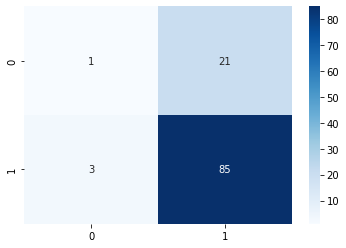

In [30]:
import matplotlib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
mat = confusion_matrix(
y_test_label_id,y_pred )

ax = sns.heatmap(mat, annot=True, cmap='Blues')


In [39]:
import sklearn
sklearn.metrics.f1_score(y_test_label_id, y_pred,average='weighted')

0.7164155432196669

In [34]:

print(sklearn.metrics.classification_report(y_test_label_id, y_pred, target_names = ['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.25      0.05      0.08        22
     class 1       0.80      0.97      0.88        88

    accuracy                           0.78       110
   macro avg       0.53      0.51      0.48       110
weighted avg       0.69      0.78      0.72       110



In [35]:
model.save_weights(filepath='final_weight_mobilenet.h5')

In [36]:
model.save('mobilenetv2')

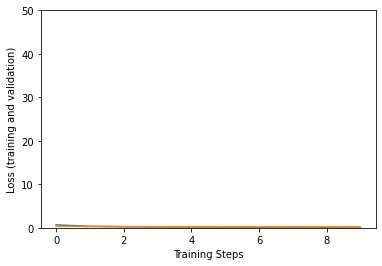

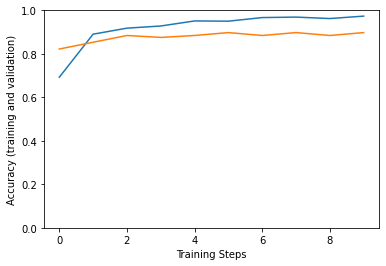

In [37]:
plt.figure()
plt.ylabel('Loss (training and validation)')
plt.xlabel('Training Steps')
plt.ylim([0,50])
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.figure()
plt.ylabel('Accuracy (training and validation)')
plt.xlabel('Training Steps')
plt.ylim([0,1])
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])